In [ ]:
# Copyright 2022 The Authors. All Rights Reserved.
#
# GNU General Public License v3.0
# Permissions of this strongest copyleft license are conditioned on 
# making available complete source code of licensed works and modifications, 
# which include larger works using a licensed work, under the same license. 
# Copyright and license notices must be preserved. 
# Contributors provide an express grant of patent rights. 
# When a modified version is used to provide a service over a network, 
# the complete source code of the modified version must be made available.
# ==============================================================================

# Title: Visualizing time-serial CRISPR repeats
# Author: Hyunjin Shim
# Date created: 20220102
# Email: jinenstar@gmail.com

# Visualizing time-serial CRISPR repeats

In [1]:
### packages

# Data
import os
from pathlib import Path 
import glob
import numpy as np
import pandas as pd
import re

# Biopython
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

# Math
import random

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# location of raw data file
datapath = Path("/Users/jinenstar/Desktop/Pro_AE_CRISPR/Data/Real")
os.chdir(datapath)

file_in = "5_tps_real_IE_curated.xlsx"

#with open(file_in) as f:
df = pd.read_excel(file_in, header=None, engine='openpyxl')
print(df)

             0     1     2     3     4     5          6   7  8  \
0   CP049608.1 -14.2 -14.2  -8.2  -8.6 -14.2  Class1_IE NaN  p   
1   CP065700.1 -15.1 -15.1  -4.9 -15.1 -10.5  Class1_IE NaN  p   
2   CP002666.1 -13.3 -12.2 -12.1  -7.7 -10.5  Class1_IE NaN  p   
3   LR134387.1 -13.3 -12.2 -12.1  -7.7 -10.5  Class1_IE NaN  p   
4   CP019799.1 -12.8 -12.8 -12.8  -9.4 -12.8  Class1_IE NaN  p   
5   CP056185.1 -15.1 -12.8 -15.1  -9.8 -14.3  Class1_IE NaN  p   
6   CP003215.1 -16.8 -16.0 -16.4 -14.2 -16.0  Class1_IE NaN  p   
7   CP039523.1 -10.8 -16.8 -16.7 -16.0  -9.8  Class1_IE NaN  p   
8   CP039522.1 -10.8 -16.8 -16.7 -16.0  -9.8  Class1_IE NaN  p   
9   CP003216.1 -10.8 -16.8 -16.7 -16.0  -9.8  Class1_IE NaN  p   
10  CP016954.1 -13.0 -14.0 -13.0 -13.0 -13.0  Class1_IE NaN  p   
11  CP000112.1 -14.3 -14.3 -14.3 -14.3 -14.3  Class1_IE NaN  p   
12  LT629773.1  -3.5 -10.3  -9.9  -9.9 -10.3  Class1_IE NaN  p   
13  CP044368.1  -7.5  -7.3 -14.2 -14.2 -11.3  Class1_IE NaN  p   
14  LR8906

In [3]:
with open(file_in + '.fa', 'w') as f:
    for i in range(len(df[0])):
        f.write(">" + str(df[0][i]) + "\n" + str(df[9][i]) + "\n")      

In [4]:
df_float_name = []
df_float = []

for index, row in df.iterrows():
    l=df.iloc[index,1:6]
    df_float_name.append(df.iloc[index][0])
    if df.iloc[index][8] == 'n':
        df_float.append(l[::-1])
    else:
        df_float.append(l)
#df[8]

In [5]:
df_float[0]

1   -14.2
2   -14.2
3    -8.2
4    -8.6
5   -14.2
Name: 0, dtype: object

In [6]:
df_p_name = []
df_p = []

for index, row in df.iterrows():
    l=df.iloc[index,1:6]
    if df.iloc[index][8] == 'p':
        df_p.append(l)
        df_p_name.append(df.iloc[index][0])
#df[8]

In [7]:
 # Make a data frame
#df=pd.DataFrame({'x': range(1,6), df_p_name[0]:df_p[0], df_p_name[1]:df_p[1], df_p_name[2]:df_p[2], df_p_name[3]:df_p[3], df_p_name[4]:df_p[4], df_p_name[5]:df_p[5], df_p_name[6]:df_p[6], df_p_name[7]:df_p[7], df_p_name[8]:df_p[8], df_p_name[9]:df_p[9], df_p_name[10]:df_p[10], df_p_name[11]:df_p[11], df_p_name[12]:df_p[12], df_p_name[13]:df_p[13], df_p_name[14]:df_p[14], df_p_name[15]:df_p[15], df_p_name[16]:df_p[16]})
df=pd.DataFrame({'x': range(1,6) })
df_add=pd.DataFrame(np.array(df_p).T.tolist(), columns=df_p_name)
df=pd.concat([df,df_add], axis=1)

In [8]:
#  # Make a data frame
# #df=pd.DataFrame({'x': range(1,6), df_p_name[0]:df_p[0], df_p_name[1]:df_p[1], df_p_name[2]:df_p[2], df_p_name[3]:df_p[3], df_p_name[4]:df_p[4], df_p_name[5]:df_p[5], df_p_name[6]:df_p[6], df_p_name[7]:df_p[7], df_p_name[8]:df_p[8], df_p_name[9]:df_p[9], df_p_name[10]:df_p[10], df_p_name[11]:df_p[11], df_p_name[12]:df_p[12], df_p_name[13]:df_p[13], df_p_name[14]:df_p[14], df_p_name[15]:df_p[15], df_p_name[16]:df_p[16]})
# df=pd.DataFrame({'x': range(1,6) })
# df_add=pd.DataFrame(np.array(df_float).T.tolist(), columns=df_float_name)
# df=pd.concat([df,df_add], axis=1)

In [9]:
df

,x,CP049608.1,CP065700.1,CP002666.1,LR134387.1,CP019799.1,CP056185.1,CP003215.1,CP039523.1,CP039522.1,...,CP030026.1,CP022135.1,AM933173.1,CP019035.1,CP001560.1,LR133996.1,LR134215.1,CP054135.1,CP029004.1,CP033904.1
0,1,-14.2,-15.1,-13.3,-13.3,-12.8,-15.1,-16.8,-10.8,-10.8,...,-14.2,-15.1,-14.2,-15.6,-14.2,-14.2,-14.2,-9.8,-8.3,-8.3
1,2,-14.2,-15.1,-12.2,-12.2,-12.8,-12.8,-16.0,-16.8,-16.8,...,-14.2,-15.1,-14.2,-15.1,-14.2,-14.2,-14.2,-3.2,-14.5,-14.5
2,3,-8.2,-4.9,-12.1,-12.1,-12.8,-15.1,-16.4,-16.7,-16.7,...,-14.2,-15.1,-14.2,-15.1,-13.7,-14.2,-14.2,-3.2,-14.5,-14.5
3,4,-8.6,-15.1,-7.7,-7.7,-9.4,-9.8,-14.2,-16.0,-16.0,...,-14.2,-15.1,-9.4,-8.5,-14.2,-14.2,-14.2,-9.8,-13.7,-13.7
4,5,-14.2,-10.5,-10.5,-10.5,-12.8,-14.3,-16.0,-9.8,-9.8,...,-14.2,-15.9,-7.0,-3.0,-13.7,-13.7,-13.7,-9.8,-13.7,-13.7


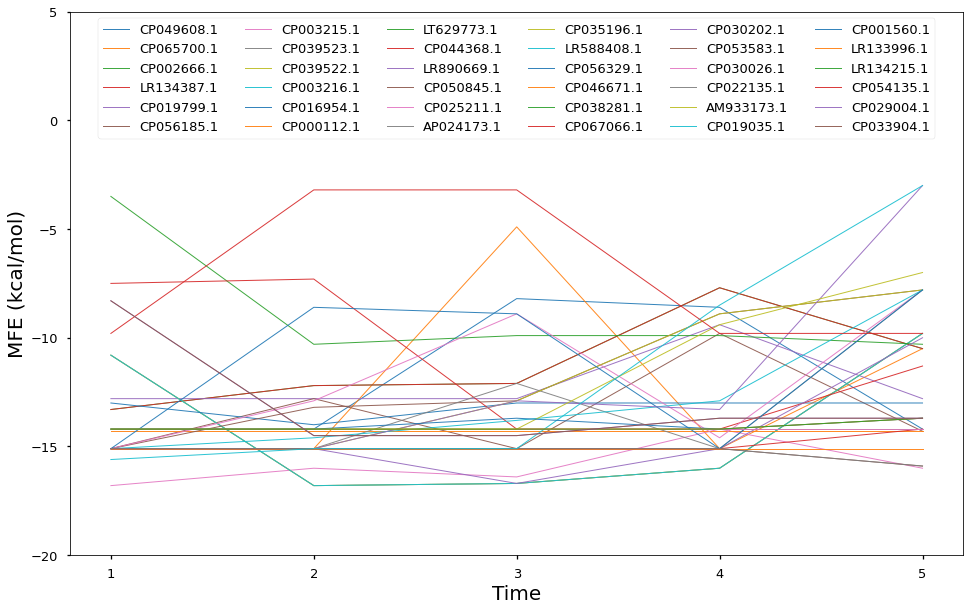

In [10]:
# Change the style of plot
fig = plt.figure(figsize=(16,10))
plt.style.use('seaborn-talk')

# Create a color palette
#palette = plt.get_cmap("tab20")
#palette = sns.color_palette("dark", 10)
 
# Plot multiple lines
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', linewidth=1, alpha=0.9, label=column) #color=palette(num),

# Add legend
plt.legend(loc=9, ncol=6, fontsize=13)
plt.ylim(-20,5)
plt.xticks(np.arange(1, 6, step=1))

# Add titles
plt.xlabel("Time", fontsize=20)
plt.ylabel("MFE (kcal/mol)", fontsize=20)

# Show the graph
plt.show()
fig.savefig('Timeseries_MFE_IE.pdf')

In [44]:
file_in = "5_tps_real_IIA_curated.xlsx"

#with open(file_in) as f:
df = pd.read_excel(file_in, header=None, engine='openpyxl')
print(df)

            0    1    2    3    4    5           6   7  8  \
0  CP028222.1  0.0  0.0  0.0  0.0 -2.6  Class2_IIA NaN  p   
1  CP016823.1 -3.0  2.9  1.5  1.5  1.5  Class2_IIA NaN  p   
2  LT960777.1  0.6  0.6 -0.6 -1.9  0.0  Class2_IIA NaN  p   
3  CP002034.1  0.0  0.0  0.0  0.3 -4.2  Class2_IIA NaN  p   
4  CP023654.1 -2.2  1.5 -0.2 -2.8 -0.4  Class2_IIA NaN  p   
5  CP012294.1  0.0  0.0  1.1  0.0  0.0  Class2_IIA NaN  p   

                                      9  
0  GTCTTGAATAGTAGTCATATCAAACAGGTTTAGAAC  
1  GCTCTTGAACTGATTGATCTGACATCTACCTGAGAG  
2  GTTGAACCACTCATTGATTTGATACTCTTCTAAAAC  
3  GTTTCAGAAGGATGTTAAATCAATTAGGTTAAGACC  
4  GTTTCAGAAGGATGTTAAATCAATAAGGTTAAGATC  
5  GTTTTAGAAGAGTGTCGAATCAATATAGTTAAGAGC  


In [45]:
with open(file_in + '.fa', 'w') as f:
    for i in range(len(df[0])):
        f.write(">" + str(df[0][i]) + "\n" + str(df[9][i]) + "\n")      

In [46]:
df_float_name = []
df_float = []

for index, row in df.iterrows():
    l=df.iloc[index,1:6]
    df_float_name.append(df.iloc[index][0])
    if df.iloc[index][8] == 'n':
        df_float.append(l[::-1])
    else:
        df_float.append(l)
#df[8]

In [47]:
df_float[0]

1      0
2      0
3      0
4      0
5   -2.6
Name: 0, dtype: object

In [48]:
df_p_name = []
df_p = []

for index, row in df.iterrows():
    l=df.iloc[index,1:6]
    if df.iloc[index][8] == 'p':
        df_p.append(l)
        df_p_name.append(df.iloc[index][0])
#df[8]

In [49]:
#  # Make a data frame
# #df=pd.DataFrame({'x': range(1,6), df_p_name[0]:df_p[0], df_p_name[1]:df_p[1], df_p_name[2]:df_p[2], df_p_name[3]:df_p[3], df_p_name[4]:df_p[4], df_p_name[5]:df_p[5], df_p_name[6]:df_p[6], df_p_name[7]:df_p[7], df_p_name[8]:df_p[8], df_p_name[9]:df_p[9], df_p_name[10]:df_p[10], df_p_name[11]:df_p[11], df_p_name[12]:df_p[12], df_p_name[13]:df_p[13], df_p_name[14]:df_p[14], df_p_name[15]:df_p[15], df_p_name[16]:df_p[16]})
# df=pd.DataFrame({'x': range(1,6) })
# df_add=pd.DataFrame(np.array(df_p).T.tolist(), columns=df_p_name)
# df=pd.concat([df,df_add], axis=1)

In [50]:
 # Make a data frame
#df=pd.DataFrame({'x': range(1,6), df_p_name[0]:df_p[0], df_p_name[1]:df_p[1], df_p_name[2]:df_p[2], df_p_name[3]:df_p[3], df_p_name[4]:df_p[4], df_p_name[5]:df_p[5], df_p_name[6]:df_p[6], df_p_name[7]:df_p[7], df_p_name[8]:df_p[8], df_p_name[9]:df_p[9], df_p_name[10]:df_p[10], df_p_name[11]:df_p[11], df_p_name[12]:df_p[12], df_p_name[13]:df_p[13], df_p_name[14]:df_p[14], df_p_name[15]:df_p[15], df_p_name[16]:df_p[16]})
df=pd.DataFrame({'x': range(1,6) })
df_add=pd.DataFrame(np.array(df_float).T.tolist(), columns=df_float_name)
df=pd.concat([df,df_add], axis=1)

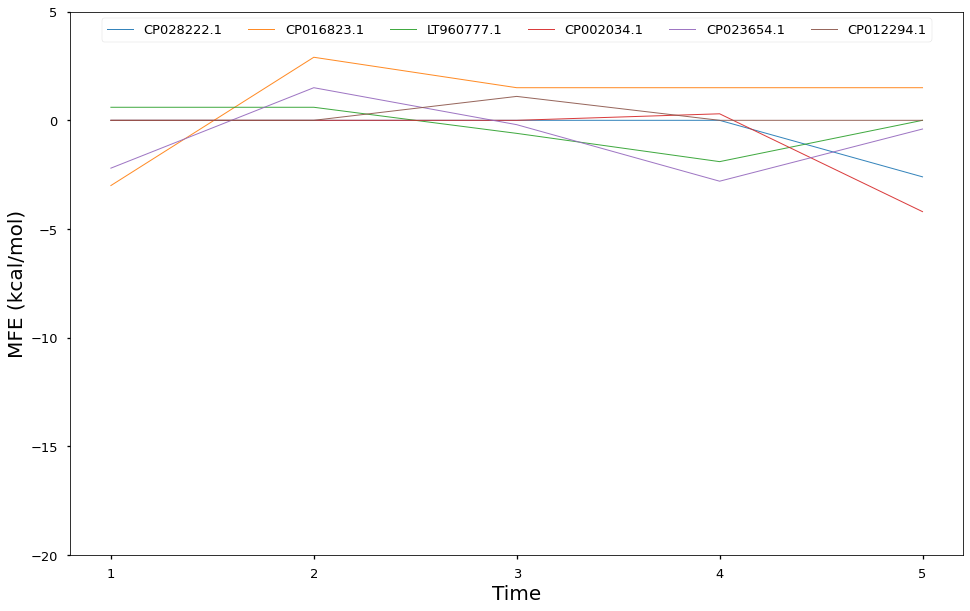

In [51]:
# Change the style of plot
fig = plt.figure(figsize=(16,10))
plt.style.use('seaborn-talk')
 
# Create a color palette
# palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', linewidth=1, alpha=0.9, label=column) #color=palette(num), 

# Add legend
plt.legend(loc=9, ncol=6, fontsize=13)
plt.ylim(-20,5)
plt.xticks(np.arange(1, 6, step=1))

# Add titles
plt.xlabel("Time", fontsize=20)
plt.ylabel("MFE (kcal/mol)", fontsize=20)

# Show the graph
plt.show()
fig.savefig('Timeseries_MFE_IIA.pdf')